In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,13))

In [20]:
labeled_sentiment = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv",encoding='unicode_escape')
labeled_sentiment

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""dont hav..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."
...,...,...,...
5995,1.370975e+18,2,@Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...
5996,1.379827e+18,3,So happy to be fully vaccinated against COVID-...
5997,1.384789e+18,2,Serum Institute of India announces cost of Cov...
5998,1.382355e+18,1,@___batshitcrazy @BarrowfordHead @Bectully I h...


In [21]:
def sentiment_scores(sentence):
	#Negative sentiment is labeled as 1, neutral as 2, and positive as 3
	ans = -1

	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()

	# polarity_scores method of SentimentIntensityAnalyzer
	# object gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)
	
	# print("Overall sentiment dictionary is : ", sentiment_dict)
	# print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
	# print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
	# print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

	# print("Sentence Overall Rated As", end = " ")

	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.45 :#0.45
		# print("Positive")
		ans = 3

	elif sentiment_dict['compound'] <= - 0.43 :#0.43
		# print("Negative")
		ans = 1

	else :
		# print("Neutral")
		ans = 2
	
	return ans


In [22]:
after_vader = list()
for tweet_text in labeled_sentiment['tweet_text']:
    temp = sentiment_scores(tweet_text)
    after_vader.append(temp)
# after_vader

In [23]:
neg_count = 0
neu_count = 0
pos_count = 0
for i in after_vader:
    if i == 1:
        neg_count += 1
    elif i == 2:
        neu_count += 1
    elif i == 3:
        pos_count += 1
print("negtive sentiments count: "+str(neg_count))
print("neural sentiments count: "+str(neu_count))
print("positive sentiments count: "+str(pos_count))

negtive sentiments count758
neural sentiments count3562
positive sentiments count1680


In [24]:
text_label = list()
for label in labeled_sentiment['label']:
    text_label.append(label)
rightCount = 0
wrongCount = 0
ansDic = list()
for i in range(len(text_label)):
    if text_label[i] == after_vader[i]:
        rightCount += 1
    else:
        ansDic.append([text_label[i],after_vader[i]])
        wrongCount += 1
accuracy = 100*rightCount/len(text_label)
print(len(ansDic))
oneTwo = 0
oneThree = 0
twoThree = 0
twoOne = 0
threeOne = 0
threeTwo = 0
for i in ansDic:
    if i[0]==2 and i[1]==3:
        twoThree += 1
    elif i[0]==2 and i[1]==1:
        twoOne += 1
    elif i[0]==3 and i[1]==1:
        threeOne += 1
    elif i[0]==3 and i[1]==2:
        threeTwo += 1
    elif i[0]==1 and i[1]==2:
        oneTwo += 1
    elif i[0]==1 and i[1]==3:
        oneThree += 1
print("1 to 2:"+str(oneTwo))
print("1 to 3:"+str(oneThree))
print("2 to 3:"+str(twoThree))
print("2 to 1:"+str(twoOne))
print("3 to 1:"+str(threeOne))
print("3 to 2:"+str(threeTwo))
print(accuracy)

2554
1 to 2:216
1 to 3:54
2 to 3:761
2 to 1:488
3 to 1:120
3 to 2:915
57.43333333333333


In [25]:
rightOne, rightTwo, rightThree = 0, 0, 0
actOne, actTwo, actThree = 0, 0, 0
print(len(labeled_sentiment['label']))
for i in range(len(labeled_sentiment['label'])):
    if after_vader[i]==1 and labeled_sentiment['label'][i]==1:
        rightOne += 1
    elif after_vader[i]==2 and labeled_sentiment['label'][i]==2:
        rightTwo += 1
    elif after_vader[i]==3 and labeled_sentiment['label'][i]==3:
        rightThree += 1
for i in range(len(labeled_sentiment['label'])):
    if after_vader[i] == 1:
        actOne += 1
    elif after_vader[i] == 2:
        actTwo += 1
    elif after_vader[i] == 3:
        actThree += 1

print(rightOne/actOne)
print(rightTwo/actTwo)
print(rightThree/actThree)
# print(actOne)
# print(actTwo)
# print(actThree)
        

6000
0.19788918205804748
0.6824817518248175
0.5148809523809523


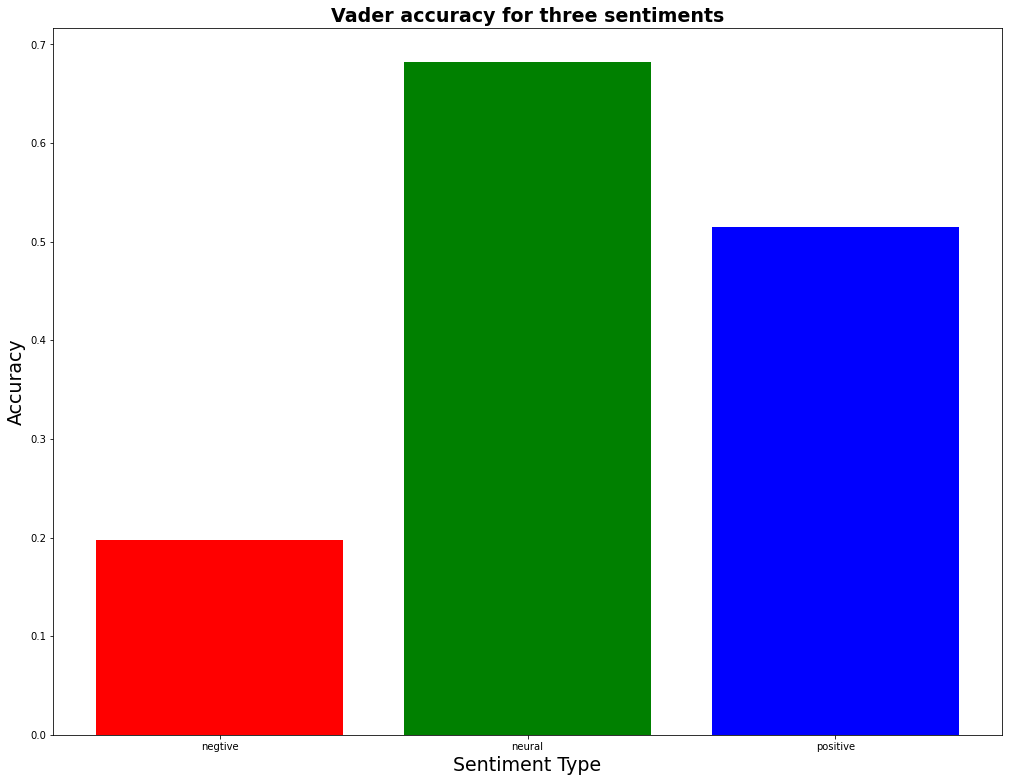

In [26]:
sentiment_list = ["negtive","neural","positive"]
accuracy_list = [rightOne/actOne, rightTwo/actTwo, rightThree/actThree]
plt.title('Vader accuracy for three sentiments',fontsize=19,fontweight='bold')
plt.bar(sentiment_list, accuracy_list, color = ['red', 'green', 'blue'])
plt.ylabel('Accuracy',fontsize=19)
plt.xlabel('Sentiment Type',fontsize=19)
plt.show()